# e7 Validation Pt II - 15th October 2019

### Comparing reconstructions of 3min & 4h listmode data from the <sup>68</sup>Ge NEMA phantom.......again

I've redefined the BG ROI - so let's run some of the code from the previous `e7_validation.ipynb` to see whether this affects our results.

## Edit - 18/10/19
I changed the histogram bin width sizes. The previous bins were:
* BinSize = 3.125
* NbGrey = 128.0
* MinBound = 0.0
* MaxBound = 400.0

The updated bins are:
* BinSize = 0.04
* NbGrey = 128.0
* MinBound = 0.0
* MaxBound = 2.5

Long story short - I didn't realise this functionality existed. The updated bin sizes will mean that the texture matrices should now exhibit different binning patterns.

Hopefully we see some evidence of this in the updated plots.



In [9]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
dataPrefix = "/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3/DATA_16_10_19_adjustedBins/{}"
filepaths = sorted(glob(dataPrefix.format("*.xls")))

# Load up the log file into pandas dataframe
logFile = glob(dataPrefix.format("*.csv"))[0]
logFileDF = pd.read_csv(logFile)
sLength = len(logFileDF["PatientNumber"])

# Create new columns to make explicit some of the protocol features
logFileDF["System"] = pd.Series(np.random.randn(sLength), index=logFileDF.index)      # -- either "e7" or "scanner" 
logFileDF["TOF"] = pd.Series(np.random.randint(sLength), index=logFileDF.index)       # -- Binary 0/1 depending if TOF 
logFileDF["PSF"] = pd.Series(np.random.randint(sLength), index=logFileDF.index)       #    or PSF enabled 
logFileDF["ScanTime"] = pd.Series(np.random.randn(sLength), index=logFileDF.index)    # -- either 3mins/240mins (4 hrs)
logFileDF["datapath"] = pd.Series(np.random.randint(sLength), index=logFileDF.index)  # -- path to .xls file

for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"Filepath"] = row["Filepath"].replace("/home/gn/SCANNER_DATA/GeNEMA_2Oct19/","")
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"System"] = row["Filepath"].split("/")[0]
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"Filepath"] = row["Filepath"].replace(row["Filepath"].split("/")[0],"")
for index,row in logFileDF.iterrows():
    if "TOF" in logFileDF.loc[index,"Filepath"] or "ToF" in logFileDF.loc[index,"Filepath"]:
        logFileDF.loc[index,"TOF"] = 1
    else:
        logFileDF.loc[index,"TOF"] = 0
    if "PSF" in logFileDF.loc[index,"Filepath"]:
        logFileDF.loc[index,"PSF"] = 1
    else:
        logFileDF.loc[index,"PSF"] = 0
for index,row in logFileDF.iterrows():
    if "-01-" in logFileDF.loc[index,"Filepath"] or "4hrs" in logFileDF.loc[index,"Filepath"] or " WB/" in logFileDF.loc[index,"Filepath"]:
        logFileDF.loc[index,"ScanTime"] = 240
    else:
        logFileDF.loc[index,"ScanTime"] = 3
i=0
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"datapath"] = filepaths[i]
    i+=1
    
# Show the finished article by uncommenting the line below:
#
logFileDF

,PatientNumber,Filepath,System,TOF,PSF,ScanTime,datapath
0,0,/GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,240.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
1,1,/GeNEMA_jsr_256-LM-00-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
2,2,/GeNEMA_jsr_256-00-OP_000_000_ctm.v-DICOM/,e7,0,0,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
3,3,/GeNEMA_jsr_256-LM-00-PSF_000_000_ctm.v-DICOM/,e7,0,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
4,4,/GeNEMA_jsr_256-WB-OP_000_000_ctm.v-DICOM/,e7,0,0,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
5,5,/GeNEMA_jsr_256-00-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
6,6,/GeNEMA_jsr_256-LM-00-OP_000_000_ctm.v-DICOM/,e7,0,0,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
7,7,/GeNEMA_jsr_256-WB-PSF_000_000_ctm.v-DICOM/,e7,0,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
8,8,/GeNEMA_jsr_256-WB-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
9,9,/GeNEMA_jsr_256-01-PSF_000_000_ctm.v-DICOM/,e7,0,1,240.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...


## Run the "maxdiff" plots from before

Hopefully these show *<1%* maxima

Code is c&p

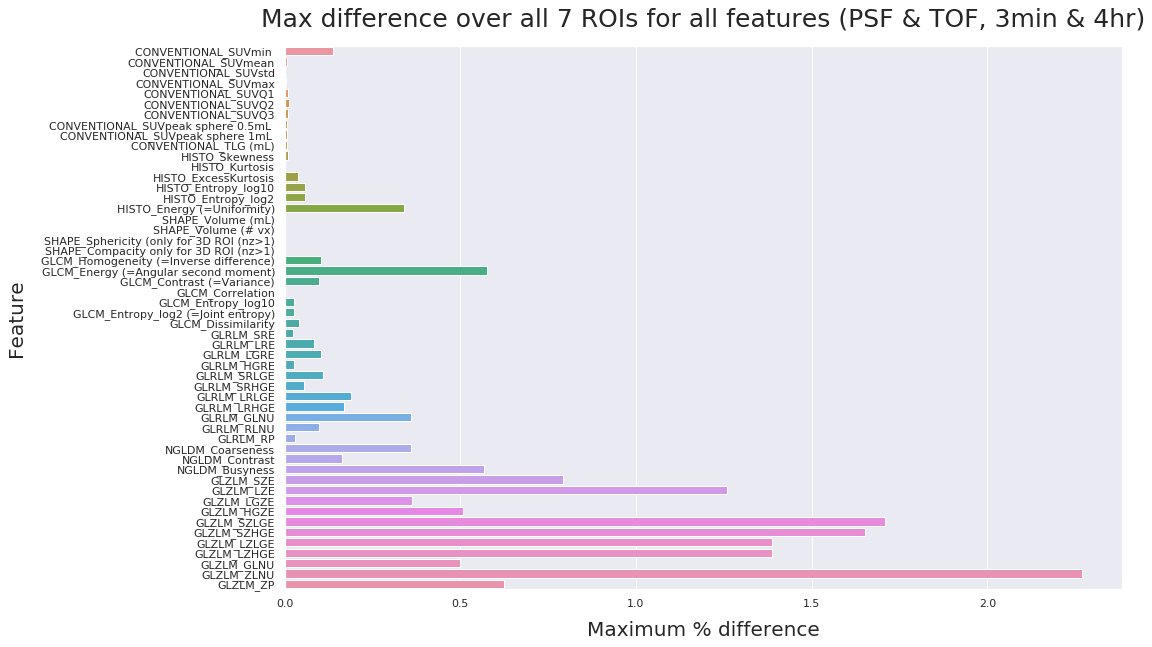

In [10]:
dataDFList = []
for fp in filepaths:
    dataDFList.append(pd.read_excel(fp))
titles = [c for c in dataDFList[0].columns]
feature = "CONVENTIONAL_SUVmean"

# Set these to be the desired comparators: 
tof = 1             # ToF included?
psf = 1             # resolution recovery (PSF) included?

# We'll want to append to new arrays
x = []
maxdiff = []

for title in titles:
    
    # As before, collect all of the datasets........
    
    e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7data = dataDFList[e7subj][title]
    scannerdata = dataDFList[scannersubj][title]
    e7data = e7data.tolist()
    scannerdata = scannerdata.tolist()
    e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7d4h = dataDFList[e7subj4h][title].tolist()
    scannerd4h = dataDFList[scannersubj4h][title].tolist()
    
    # Apply conditions; we only want the numerical features, which have to be non-zero in order to satisfy a
    # "percentage difference" calculation
    #
    # Note as well, the "params" features will be equal for every dataset, so their inclusion is superfluous here.
    if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h and "PARAMS" not in title:
        y3m = []
        for i in range(0,len(e7data)):
            y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
        y4h = []
        for i in range(0,len(e7d4h)):
            y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
        x.append(title)
        maxdiff.append(max([abs(y) for y in y3m+y4h]))

x = [i.replace(" (value only for PET or NM)","") for i in x]
fig = plt.figure(figsize=(15,10))
#plt.tight_layout()
ax = fig.add_subplot(1, 1, 1)
sns.barplot(y=x,x=maxdiff)
#plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot.png",format='png', bbox_inches = "tight")
plt.show()
plt.close()


### OK, so this looks good

We see the differences exhibited in the GLZLM (gray level zone length matrix), but again differences of around 2% aren't to be unexpected.

Hopefully this can be verified by looking at more images.

### Let's remove the BG ROIs to see if this changes at all

Hopefully there's no difference, saying that the largest differences don't originate from the BG ROI

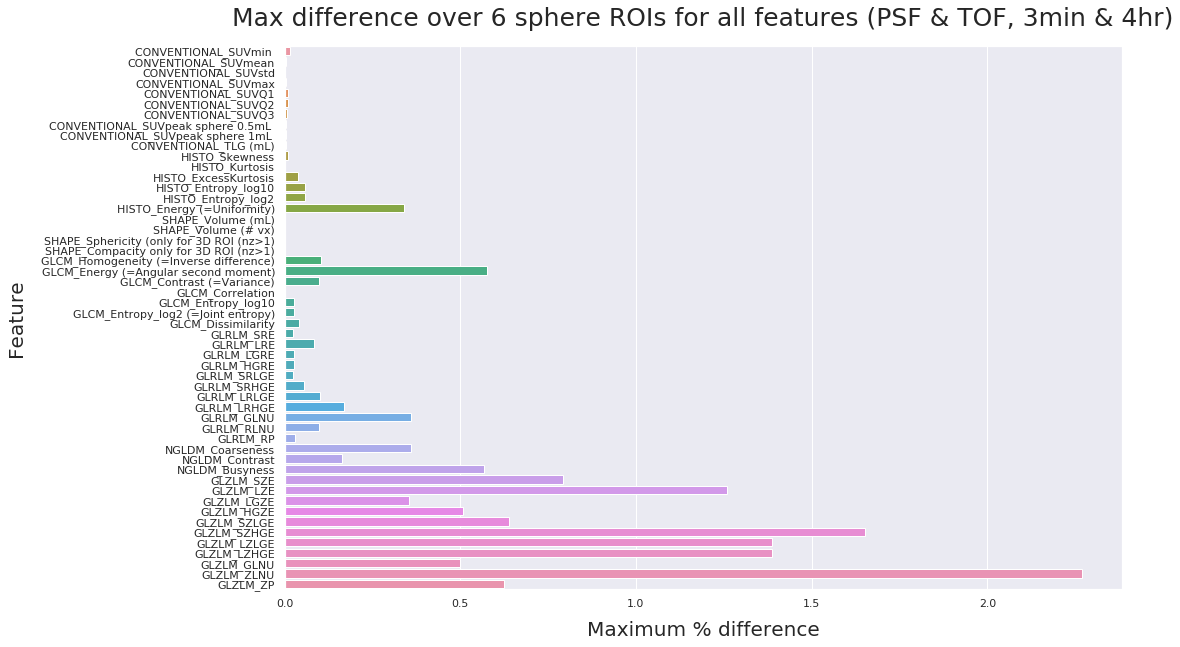

In [11]:
x = []
maxdiff = []
for title in titles:
    e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7data = dataDFList[e7subj][title]
    scannerdata = dataDFList[scannersubj][title]
    e7data = e7data.tolist()
    scannerdata = scannerdata.tolist()
    e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7d4h = dataDFList[e7subj4h][title].tolist()
    scannerd4h = dataDFList[scannersubj4h][title].tolist()
    if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h and "PARAMS" not in title:
        y3m = []
        for i in range(0,len(e7data)):
            y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
        y4h = []
        for i in range(0,len(e7d4h)):
            y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
        x.append(title)
        maxdiff.append(max([abs(y) for y in y3m[1:]+y4h[1:]])) # taking out the first element in each array, corresponding to BG ROI

x = [i.replace(" (value only for PET or NM)","") for i in x]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(y=x,x=maxdiff)
#plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("Max difference over 6 sphere ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot_wo_BG.png",format='png', bbox_inches = "tight")
plt.show()
plt.close()

## The largest change between here and the previous plot is manifest in the SUV<sub>min</sub>

Let's just check if these differences don't come from the 4hour scan in particular...

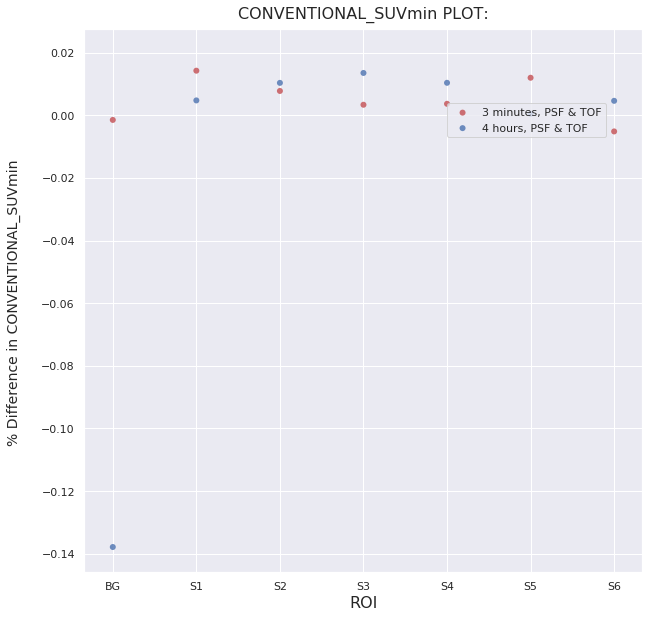

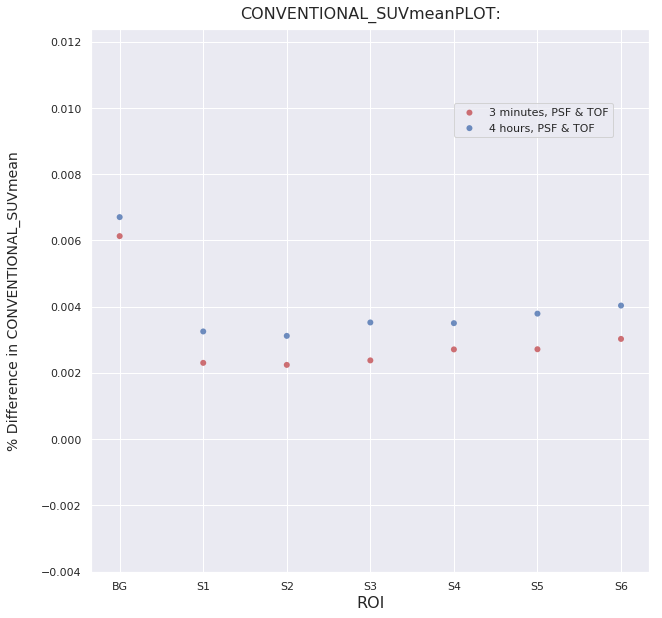

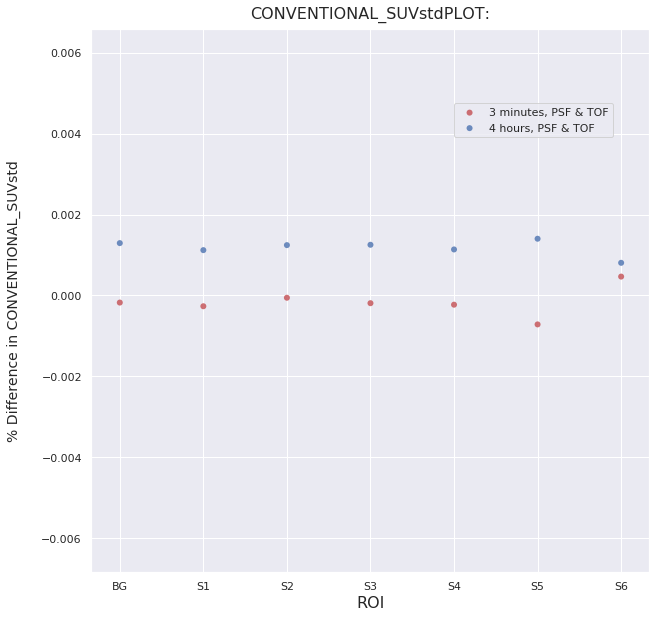

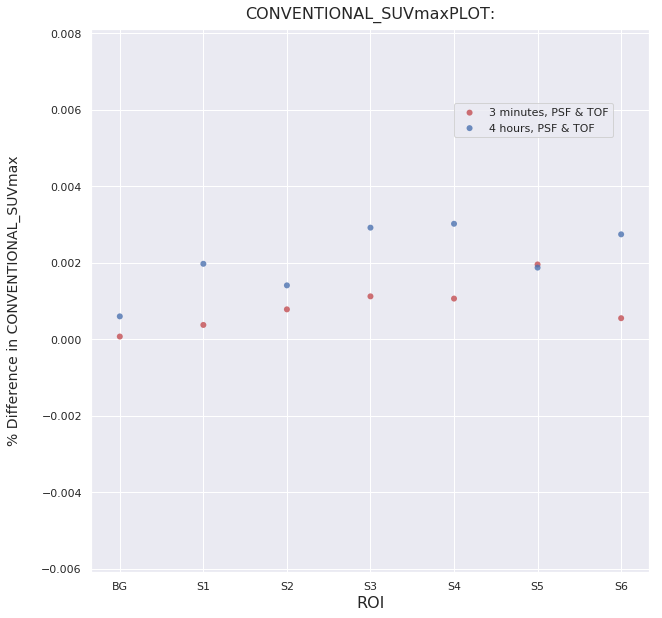

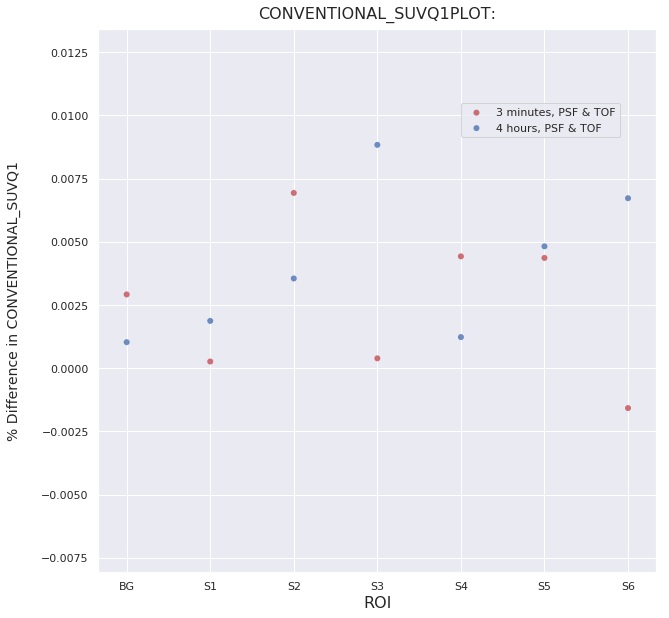

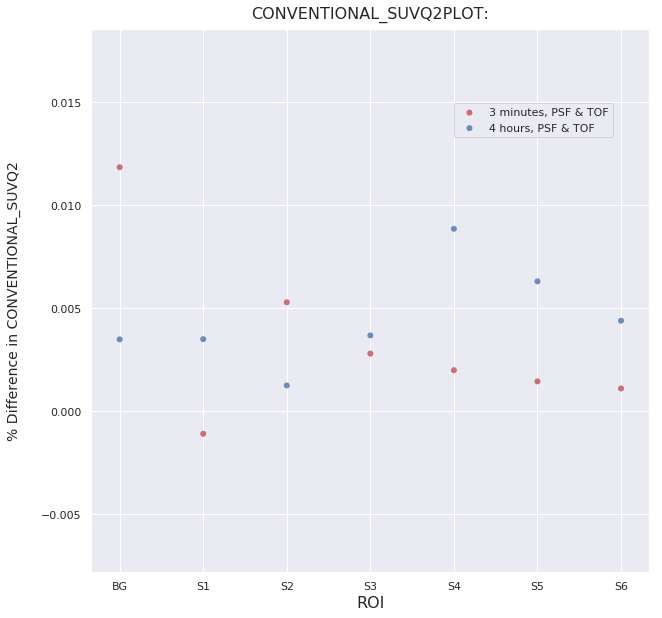

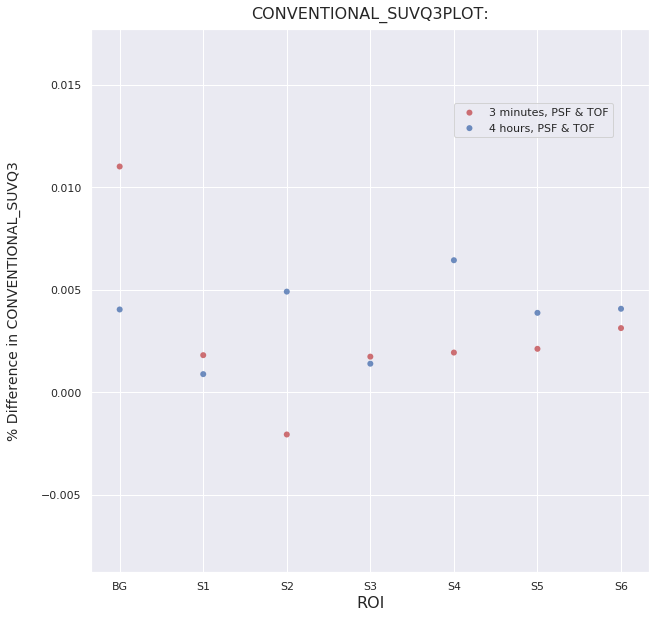

In [13]:
for title in titles[:14]:

    e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    
    e7data = dataDFList[e7subj][title]
    scannerdata = dataDFList[scannersubj][title]
    e7data = e7data.tolist()
    scannerdata = scannerdata.tolist()
    #print(e7data,scannerdata)
    e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7d4h = dataDFList[e7subj4h][title].tolist()
    scannerd4h = dataDFList[scannersubj4h][title].tolist()
    if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h:
        x = ["BG","S1","S2","S3","S4","S5","S6"]
        y3m = []
        for i in range(0,len(e7data)):
            y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
        y4h = []
        for i in range(0,len(e7d4h)):
            y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1, 1, 1)
        #print(y3m,y4h)
        g1 = (x,y3m)
        g2 = (x,y4h)
        data = (g1,g2)
        colors = ("r","b")
        groups = ("3 minutes, PSF & TOF", "4 hours, PSF & TOF")
        #plt.ylim(0,0.0075)
        for data, color, group in zip(data, colors, groups):
            x, y = data
            #print(x,y)
            ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', label=group)
        plt.title(title + "PLOT:", size=16, pad=10)
        plt.ylabel("% Difference in {}".format(title),labelpad=20, fontsize=14)
        plt.xlabel("ROI", fontsize=16)
        plt.legend(loc=(0.65,0.8))
        #plt.savefig("diffplot_{}.png".format(title),format="png")
        plt.show()
        plt.close()